In [3]:
# 6.1.4 cont...
# Create Latitude and Longitude Combinations
# import the Pandas, Matplotlib, and NumPy dependencies

# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# In the next cell, we'll add the code that generates the latitudes and longitudes, but first, they need to be stored so that we can access them later. Since we are creating arrays of latitudes and longitudes, we'll declare each array as a variable.
# add the following code that we used to generate the random latitudes. Also, we'll create a similar code snippet that will generate longitudes. To ensure enough latitudes and longitudes, we'll start with 1,500. In addition, we'll pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.
# When we run this cell, the output is a zip object in memory.

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.
# Let's practice zipping a small number of latitudes and longitudes and then unpacking the zipped tuple to see how the packing and unpacking work.

# continues in API_practice.ipynb

In [6]:
# continued from API_practice.ipynb
# Next, let's unpack our lat_lngs zip object into a list. This way, we only need to create a set of random latitudes and longitudes once.
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [7]:
# NOTE: You can only unzip a zipped tuple once before it is removed from the computer's memory. Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.


In [8]:
# You lean back from your desk and reflect on the project thus far. Not only have you successfully navigated a quick return to the geographic coordinate system and the Earth's geography, you also wrote code to generate 1,500 latitudes and longitudes.
# Now, as cool as this is, your clients aren't going to want information or suggestions provided to them in this format. So, it's time to get started on the next step in your project plan: match those coordinates up with cities.
# We are making great progress. With our list of random latitudes and longitudes, we'll use the coordinates in our lat_lngs tuple to find the nearest city using Python's citipy module.
# Since we haven't worked with the citipy module yet, let's import and test it. Citipy doesn't come with the Anaconda module, so we'll install it in our PythonData environment.
# The citypy documentation (Links to an external site.) instructs us to install the citipy module by typing pip install citipy. To complete the installation, follow the instructions for your operating system.
# To learn how to use citypy, click "Homepage" on the module webpage or see the GitHub citipy repository (Links to an external site.).
# Select the README.md file on the citipy GitHub page for an example of how to use citipy to locate the nearest city and its country code from a pair of latitude and longitude coordinates.
# Under "Looking up with coordinates," the first line says from citipy import citipy, meaning we'll import the citipy script from the citipy module.
# This script is located in the GitHub repository 


In [9]:
# NOTE: When a Python file containing a script is imported to use in another Python script, the .py extension does not need to be added to the name of the file when using the import statement.


In [10]:
# Let's import the citipy script and practice using it. In our API_practice file, add a new cell and import the citipy.py script from the citipy module.
# continued in API_practice

In [11]:
# 6.1.5 continued from API_practice
# Now that we are familiar with using the citipy module, we can iterate through our zipped lat_lngs tuple and find the nearest city. When we find a city, we'll need to add it to a list so that we can use the cities to get the weather data.
# First, import the citipy module
from citipy import citipy

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [14]:
# Some of this code should look familiar, but let's break it down:

# We create a cities list to store city names.
# We iterate through the coordinates, as in our practice, and retrieve the nearest city using the latitude and longitude pair.
# We add a decision statement with the logical operator not in to determine whether the found city is already in the cities list. If not, then we'll use the append() function to add it. We are doing this because among the 1,500 latitudes and longitudes, there might be duplicates, which will retrieve duplicate cities, and we want to be sure we capture only the unique cities.

In [15]:
# NOTE: The citipy module finds the nearest city to the latitude and longitude pair with a population of 500 or more.


In [16]:
# FINDING: When you run the code block, you should get slightly more than 500 unique cities. If you get fewer than 500, increase your size limit on the np.random.uniform() function.


In [17]:
# 6.2.1 Understanding APIs
# Time to get some weather data. During a brainstorming session with Jack, you decide to use the OpenWeatherMap Application Programming Interface (API) to get the weather data for your database. Of course, now comes the tricky part: actually getting the data. You know you can do this using an API–but how do you use an API? Time to dig back in. The weather data is visually displayed on maps for the customer. But, in order for that to happen, you'll need to retrieve the weather from each city in your database. Since this is your first time using an API to get data from a server, your manager would like you to review APIs and how your company retrieves the data.
# When a client uses our company's website to search for hotels, our search engine will gather information from a variety of websites based on the client's preferences through APIs. An API call is very similar to navigating to a website. An API points to a URL and collects some data from the webpage or server.
# When clients request information from our server through our website, they are making an API call. Once our database has the client's search criteria, our servers search the web for hotels on behalf of the client. Now the roles are reversed: our company is the client requesting information, and all the websites where we derive information are the servers.
# Using an API has its limitations because not all information from a server is accessible. Most APIs have tiered services, from free to paid. Free services allow access to limited information, and paid subscriptions provide more access based on the payment plan. Our company has a paid subscription for APIs, but we can only get certain information from websites on hotels such as location, accessibility, rooms, prices, services, and amenities, as well as regional weather data.
# Now that you have a general concept of how APIs work, let's register for an OpenWeatherMap API key, a token granting access, and use it to retrieve weather data.


In [18]:
# 6.2.2 Get Started with OpenWeatherMap API
# Awesome. You get it—mostly. We'll use the API setup to go out and get information when our clients ask us for it. So, now it's time to download the Python Requests Library and register for an API key.
# Register for an API Key
# Follow these steps to register for an OpenweatherMap API key:
    #Navigate to the OpenWeatherMap website (Links to an external site.).
    #Click "sign up."
    #Complete the form Create New Account.
    #Once you have a new account, sign in and click on "API keys."
    #The site will likely generate an API key automatically. If not, under "Create key," type a name in the available cell and click "Generate" to create an API key.
    #Save your API key to a Python file, which we'll add as a dependency to your WeatherPy.ipynb file.
        #Navigate to your World_Weather_Analysis folder and launch Jupyter Notebook.
        #Click the New button and select Text File.
        #Rename the text file config.py.
        #On the first line, type weather_api_key="" and add your API key between the double quotation marks.
        #Save and close the config.py file.
        #Click on "Services" for details on your free subscription and its limitations.
        #Click on "View" to see more options on your plan, and then click on "Current weather API" to see how to get the current weather from a city.
        #We'll refer to this documentation when we make an API call to the server.

In [19]:
# NOTE: You can also create the config.py file using VS Code.

In [20]:
# IMPORTANT: Don't share your API key with anyone, and do not add the config.py file to your GitHub repository–someone might copy and use it, and you could incur charges on your credit card.

In [21]:
# The JavaScript Object Notation Format for API Data
# The API has reached the website or server, its endpoint, and now we can retrieve data from the website. When we retrieve data from a website, we have to make a "request," which returns data in a text format, not in a tab- or comma-separated file.
# One format we can use to parse data is JavaScript Object Notation (JSON). The JSON format is also referred to as an "object" or "JSON object." The data inside a JSON object opens and closes with curly braces, much like a Python dictionary. Inside the JSON object is a collection of dictionaries and arrays.


In [22]:
# The Python Requests Library
# To request JSON data over the internet, we use the Requests Library in Python. The Anaconda installation comes with version 2.22 of the Requests Library.
# Confirm you have the latest version of the Requests Library using the command line, or in the Jupyter Notebook environment. Follow the instructions for your operating system.
# macOS
    #Launch the command line and activate your PythonData environment.
    #After the prompt, type $ python to launch Python.
    #After the Python prompt, >>>, type import requests and press Enter.
    #On the next line, type requests.__version__ and press Enter.
    #The output should be version 2.22.0 or later.

#Alternatively, you can check the version of request in Jupyter Notebook.

#In Jupyter Notebook, create a new file if one hasn't been created. Add the following code to the new cell and run it.
    # import requests
    #requests.__version__
# The output should be 2.22.0 or later.
# If you have an older version, please upgrade it in your PythonData environment by typing conda install -c conda-forge requests at the command prompt and press Enter.


In [23]:
import requests
requests.__version__

'2.25.1'

In [24]:
# 6.2.3 Make an API Call
# You're about to start just trying random functions to see what works when Jack texts you and tells you your company has a free in-house API tutorial that was designed to teach new team members how to do this very thing. And it gets better–he sent you the link to the tutorial, too. Excited, you click through to access the API tutorial.

# continued in API_practice....

In [25]:
# continued from API_practice
# We will now work in our WeatherPy.ipynb file. Before continuing, make sure the following tasks are completed:

# Import your Requests Library and the weather_api_key.
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

# Build the basic URL for the OpenWeatherMap with your weather_api_key added to the URL.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [26]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


Beginning Data Retrieval     
-----------------------------


In [27]:
# Loop Through the List of Cities and Build the City URL
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
        # Loop through all the cities in the list.
        for i, city in enumerate(cities):

            # Group cities in sets of 50 for logging purposes.
            if (i % 50 == 0 and i >= 50):
                set_count += 1
                record_count = 1
    
        # Create endpoint URL with each city.
        city_url = url + "&q=" + city.replace(" ","+")

        # Log the URL, record, and set numbers and the city.
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
        # Add 1 to the record count.
        record_count += 1
    
        # added from try-except module directions after original code block
        # Run an API request for each of the cities.
        try:
            # Parse the JSON and retrieve data.
            city_weather = requests.get(city_url).json()
            # Parse out the needed data.
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            # Convert the date to ISO standard.
            city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            # Append the city information into city_data list.
            city_data.append({"City": city.title(),
                                "Lat": city_lat,
                                "Lng": city_lng,
                                "Max Temp": city_max_temp,
                                "Humidity": city_humidity,
                                "Cloudiness": city_clouds,
                                "Wind Speed": city_wind,
                                "Country": city_country,
                                "Date": city_date})

        # If an error is experienced, skip the city.
        except:
            print("City not found. Skipping...")
            pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
# end of added block of code from try except 
    
# Create endpoint URL with each city.
city_url = url + "&q=" + cities[i]

Processing Record 1 of Set 14 | almenara
Processing Record 1 of Set 27 | almenara
Processing Record 1 of Set 40 | almenara
Processing Record 1 of Set 53 | almenara
Processing Record 1 of Set 66 | almenara
Processing Record 1 of Set 79 | almenara
Processing Record 1 of Set 92 | almenara
Processing Record 1 of Set 105 | almenara
Processing Record 1 of Set 118 | almenara
Processing Record 1 of Set 131 | almenara
Processing Record 1 of Set 144 | almenara
Processing Record 1 of Set 157 | almenara
-----------------------------
Data Retrieval Complete      
-----------------------------


In [28]:
# The syntax for the enumerate() method is the following:
# for i, item in enumerate(list):

In [29]:
#for i, item in enumerate(list):

In [30]:
# Handle API Request Errors with try-except Blocks
# We have handled request errors for getting the response from a valid city with an API call using conditional statements. Now we'll learn how to handle errors while parsing weather data from a JSON file.
# We'll add a try-except block to our code to prevent the API request from stopping prematurely if the city_weather request isn't a valid response. If the request isn't valid, the code will not find the first item requested, which is the dictionary "coord" with the code city_lat = city_weather["coord"]["lat"], and skip the city and continue to run.
# The try-except block has similar syntax and structure as the if-else statement. The basic format is as follows:
##try:
##  Do something
##except:
##  print("An exception occurred")
# We can add a try-except block to our code and, below the tryblock, we will parse the data from the JSON file and add the data to the cities list.
# Let's add a try block. Then, below the try block, do the following:
    # Parse the JSON file.
    # Assign variables for each piece of data we need.
    # Add the data to the cities list in a dictionary format.
# Add the following code after record_count += 1



In [31]:
# Let's review the code:

    # We parse the JSON file for the current city.
    # If there is no weather data for the city, i.e. , a <Response [404]> then there is no weather to retrieve and City not found. Skipping... is printed.
    # If there is weather data for the city, we will retrieve the latitude, longitude, maximum temperature, humidity, cloudiness, wind speed, and date and assign those values to variables.
    # We could write a try-except block for each one of these parameters to handle the KeyError if the data wasn't found, but since these parameters are always present in the response this won't be necessary.
    # We append the cities list with a dictionary for that city, where the key-value pairs are the values from our weather parameters.
    # Finally, below the try block and after the except block, we add the closing print statement, which will let us know the data retrieval has been completed. Make sure that your except block is indented and in line with the try block, and that the print statements are flush with the margin.
    # Under the print statement in the except block, we add the pass statement, which is a general purpose statement to handle all errors encountered and to allow the program to continue.


In [32]:
# IMPORTANT: Generally, it isn't good coding practice to add the pass statement to the except block. Ideally, we want to handle or catch each error as it happens and do something specific (e.g., add another try block or print out the error).


In [33]:
# Now you have all your code to perform the API calls for each city and parse the JSON data. Let's run the cell!
# **above code block

In [34]:
# After collecting all our data, we can tally the number of cities in the city_data array of dictionaries using the len() function.

# IMPORTANT: If you didn't get more than 500 cities, run the code to generate random latitude and longitude combinations and all the code below it. Or increase the size of the latitude and longitude combinations.

# NOTE: For more information about the try-except blocks, see the documentation on errors and exceptions (Links to an external site.).


In [35]:
# 6.2.7 Create a DataFrame of City Weather Data
# You have the data in a list of dictionaries, which is a format that you can use to create a Pandas DataFrame. You will also need to export the DataFrame as a CSV file for Jack.
# Our next steps will entail converting the array of dictionaries to a DataFrame, ensuring the columns are in the correct order, and exporting the DataFrame to a comma-separated (CSV) file.

# REWIND: Recall that we can convert a list of dictionaries to a Pandas DataFrame using df = pd.DataFrame(list with dictionaries).


In [36]:
# In a new cell, add the following code to convert the array of dictionaries to a Pandas DataFrame and run the cell.
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Almenara,-16.1836,-40.6944,87.55,46,91,6.24,BR,2021-10-08 17:00:37
1,Almenara,-16.1836,-40.6944,87.55,46,91,6.24,BR,2021-10-08 17:00:37
2,Almenara,-16.1836,-40.6944,87.55,46,91,6.24,BR,2021-10-08 17:00:37
3,Almenara,-16.1836,-40.6944,87.55,46,91,6.24,BR,2021-10-08 17:00:37
4,Almenara,-16.1836,-40.6944,87.55,46,91,6.24,BR,2021-10-08 17:00:37
5,Almenara,-16.1836,-40.6944,87.55,46,91,6.24,BR,2021-10-08 17:00:37
6,Almenara,-16.1836,-40.6944,87.55,46,91,6.24,BR,2021-10-08 17:00:37
7,Almenara,-16.1836,-40.6944,87.55,46,91,6.24,BR,2021-10-08 17:00:37
8,Almenara,-16.1836,-40.6944,87.55,46,91,6.24,BR,2021-10-08 17:00:37
9,Almenara,-16.1836,-40.6944,87.55,46,91,6.24,BR,2021-10-08 17:00:37


In [37]:
# Next, we'll reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, so they are easy to read.

# REWIND: Recall that to reorder the columns, we assign a variable to an array of the columns in the order we want them to appear:
# new_column_order = ["column2", "column4", "column1"]
# Then, we assign a new or the same DataFrame with new column order:
# df = df[new_column_order]
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Almenara,BR,2021-10-08 17:00:37,-16.1836,-40.6944,87.55,46,91,6.24
1,Almenara,BR,2021-10-08 17:00:37,-16.1836,-40.6944,87.55,46,91,6.24
2,Almenara,BR,2021-10-08 17:00:37,-16.1836,-40.6944,87.55,46,91,6.24
3,Almenara,BR,2021-10-08 17:00:37,-16.1836,-40.6944,87.55,46,91,6.24
4,Almenara,BR,2021-10-08 17:00:37,-16.1836,-40.6944,87.55,46,91,6.24
5,Almenara,BR,2021-10-08 17:00:37,-16.1836,-40.6944,87.55,46,91,6.24
6,Almenara,BR,2021-10-08 17:00:37,-16.1836,-40.6944,87.55,46,91,6.24
7,Almenara,BR,2021-10-08 17:00:37,-16.1836,-40.6944,87.55,46,91,6.24
8,Almenara,BR,2021-10-08 17:00:37,-16.1836,-40.6944,87.55,46,91,6.24
9,Almenara,BR,2021-10-08 17:00:37,-16.1836,-40.6944,87.55,46,91,6.24


In [38]:
# Lastly, following the instructions below, we'll create an output file to save the DataFrame as a CSV in a new folder for that file.
# In our World_Weather_Analysis folder, create a new folder called "weather_data." Add the following code to a new cell, run the cell, then confirm your CSV file is in the folder.
# # Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# The last line in the code block will export the DataFrame to a CSV file, with the index label (or column A) header as "City_ID." If we ever need to export the CSV file to a DataFrame, that header will be present in the DataFrame.
# We've completed our tasks for making API calls, parsing the response, and collecting the data for our project. Before we move on to graphing and statistical analysis, let's update our GitHub repository.


In [39]:
# Modify the .gitignore File
# We don't want the config.py file containing the API key to be exposed to the public on GitHub, as this would mean anyone could copy and use our API key, possibly causing us to incur charges.
# When we type git status in the command line, we can see all the files we have created so far that are untracked.
# If we only wanted to add the WeatherPy.ipynb file to GitHub we could type: git add WeatherPy.ipynb
# However, every time we want to add a new file or update current files to the repository, we have to add each file individually, which is time-consuming and cumbersome. Instead, we can add the files we don't want to track to the .gitignore file.

In [40]:
# REWIND: GitHub does not track files and extensions that are added to the .gitignore file.

In [41]:
# Before we add our files to GitHub, let's add config.py to the .gitignore file. Follow these steps:
    # Open your World_Weather_Analysis GitHub folder in VS Code.
    # Open the .gitignore file, and on the first line type the following:
        # Adding config.py file.
        # config.py
    # While the .gitignore file is open, add the API_practice.ipynb and random_numbers.ipynb files and save the file.
    # In the command line, type git status and press Enter. The output should say the .gitignore file has been modified and the WeatherPy.ipynb file is untracked.
    # Use git add, git commit, and git push to commit the modifications to .gitignore and the WeatherPy.ipynb file to GitHub.
    

In [42]:
# 6.3.1 Plot Latitude vs. Temperature
# After exporting your CSV file, you closed your laptop and headed home, confident in a good day's work. And, when you come into work the next day, you hear that someone else has been impressed with your work as well—Jack! In fact, Jack is so impressed that he wants to give you the opportunity to take the day to dedicate some time to a different project: creating a community outreach website for middle school STEM students.
# This is an exciting project. These community-focused opportunities don't come around as often as you would like, and they are a great chance to get kids involved in STEM. Additionally, you work with other tech companies in the area, each taking on one aspect of the project.
# Your company is going to focus on climate change, and since you know how to use Matplotlib, you decide to create some visualizations that showcase the weather parameters you retrieved with changing latitude for the 500-plus cities from all over the world. The students will then be able to use these visualizations to explore how weather parameters change based on latitude.

# We are going to create a series of scatter plots for each weather parameter against the latitude for all the cities. The students will use these scatter plots to write a summary report on how different weather parameters change based on the latitude.
# We'll create scatter plots for latitude vs. maximum temperature, humidity, cloudiness, and wind speed.

In [43]:
# REWIND: Recall that to create a scatter plot, we collect then add x- and y-axis data to plt.scatter().

In [44]:
# Get Data for Plotting
# First, we'll retrieve the data we need to create our scatter plots. We will need latitude, maximum temperature, humidity, cloudiness, and wind speed from all the cities. Add the following code to a new cell and run the cell.

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [45]:
# Your final scatter plot will need the current date in the title. To add the current date, we will need to import the time module, rather than the datetime module that we used to convert the date. The time module is a standard Python library, so there is no need to install it.
# In a new cell in our API_practice.ipynb file, we will import the time module and some code to practice how to use this module.
# continued in API_practice.ipynb....

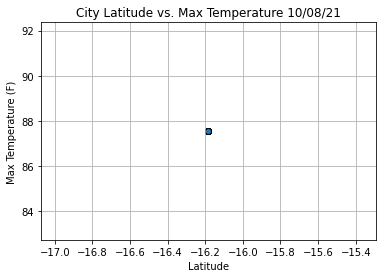

In [46]:
# continued from API_practice.ipynb
# In a new cell in WeatherPy, add the following code to create a scatter plot for the latitude vs. maximum temperature and run the cell.

# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [47]:
# The balance of the scatter plots will share the same format. All we need to do is change the y-axis variable for each weather parameter. Let's create the scatter plots quickly by copying the code and changing the y-axis variable.

In [48]:
# NOTE: For more information, see the documentation on the time module (Links to an external site.).

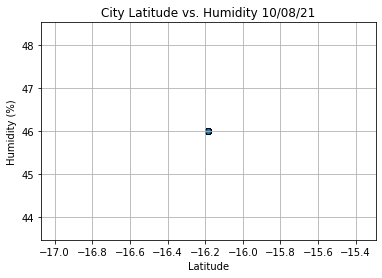

In [49]:
# 6.3.2 Plot Latitude vs. Humidity
# Great job on the first scatter plot! Now, you need to create a scatter plot that compares the latitude vs. the humidity.
# We can repurpose our code for the maximum temperature scatter plot and create a scatter plot for the latitude versus humidity.
# In addition to changing the y-axis variable to "humidity," we need to change the title to "Humidity," and the y-axis label to "Humidity (%)."
# In a new cell, add the following code and run the cell.

# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

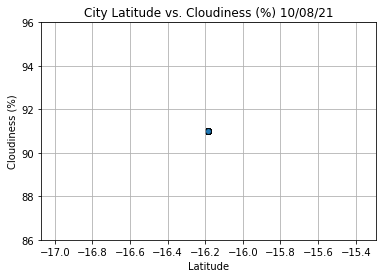

In [50]:
# 6.3.3 Plot Latitude vs. Cloudiness
# You have a few more plots to create, and you know that it's time to stay hyperfocused. Whenever you start reusing code, it gets a bit easier to make a mistake. These charts will be on a public website for all to see, so the stakes are high.
# Let's refactor the code for our scatter plots by changing the y-axis variable to "cloudiness," the title to "Cloudiness (%)," and the y-axis label to "Cloudiness (%)."
# In a new cell, add the following code and run the cell.

# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

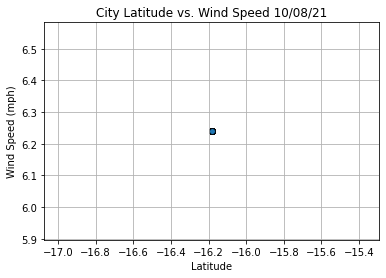

In [51]:
# 6.3.4 Plot Latitude vs. Wind Speed
# You have one last scatter plot to make. If you can make it through this one, you'll be done with scatter plots for the day. Just be sure to upload them to GitHub so the team working on the STEM project can get them for the community outreach website!
# Now, we can create our last scatter plot! Let's repurpose the code we have been using and change the y-axis variable to "wind speed," the title to "Wind Speed," and the y-axis label to "Wind Speed (mph)."
# In a new cell, add the following code and run the cell.

# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [52]:
# Add your WeatherPy.ipynb file to your World_Weather_Analysis GitHub repository.

In [53]:
# 6.4.1 Use Linear Regression to Find the Relationship Between Variables
# Jack loves your work on the scatter plots thus far, and the other tech companies were impressed, too. They ask you to put together something that can help the students explore how to determine correlations between weather data and latitude.
# You and Jack decide to divide and conquer this task. He will write the piece on the scientific method and describe how to use linear regression on the scatter plots. You volunteer to use your scatter plot skills to create scatter plots for each weather parameter on the Northern and Southern Hemispheres. You'll need to also add a regression line equation and correlation coefficient to each scatter plot, so your first step is to brush up on linear regression. You know this is something Jack uses regularly, so you'll need to really understand it if you want to continue impressing the team.

# Linear regression is used to find a relationship between a dependent variable and one or more independent variables. The trick is to find something (a dependent variable) that depends on something else (the independent variable) and plot that relationship.
# For example, let's say we wanted to understand how weather affects ice cream sales. We would model the linear regression between temperature (the independent variable) and ice cream sales (the dependent variable). Our hypothesis about the relationship would be that as temperatures rise, as they do in summer, more ice cream is sold. We will learn more hypothesis testing and building models in later modules.
# For your project, you've already been working with independent and dependent variables. We have enough data to test relationships by creating scatter plots as we've done for each weather parameter vs. latitude. Plotting the data is the first step in determining if there might be an association between the two variables. For our scatter plots, the independent variable is the latitude, plotted on the x-axis, as its value is fixed. When we change the latitude, temperature changes, making it the dependent variable.

In [54]:
# IMPORTANT: Independent variable: the variable changed by the analyst to observe how it affects the dependent variable 
# IMPORTANT: Dependent variable: the variable tested by the analyst to observe how it is affected by the independent variable

In [55]:
# To determine if maximum temperature correlates to latitude, we can plot a linear regression line, a straight trendline predicting the average y-value, or dependent variable, for a given x-value, or independent variable. This line can be plotted using the equation y = mx + b, where "m" is the slope of the line and "b" is the y-intercept. For every x-value, or latitude we use in the equation, we will get a predicted temperature value.
# To determine how strong the relationship is between the fitted line and the data, we find the correlation coefficient, or r-value. A correlation coefficient close to 1 shows a strong positive correlation, whereas close to –1 shows a strong negative correlation. A correlation coefficient close to zero is no correlation.
# Let's practice using linear regression on fake weather data.

In [56]:
# Practice Using Linear Regression
# In a new cell of our random_numbers Jupyter Notebook file, we'll import the linear regression function from the SciPy statistics module.
# continued in random_numbers

In [57]:
# continued from random_numbers
# 6.4.2 Find the Correlation Between Latitude and Maximum Temperature
# Now that you are familiar with generating linear regression lines and equations, you can put this knowledge to work by generating a regression line for latitude and maximum temperature for the Northern and Southern Hemispheres.
# Using the data from the Northern and Southern Hemispheres, we are going to perform linear regression on all four weather parameters: maximum temperature, humidity, cloudiness, and wind speed.
# We have an algorithm that performs the linear regression; returns the equation of the regression line, and correlation coefficient, and p value; and adds the regression line to a scatter plot of city weather data. Below, the code looks like what we have used before.

# Import linregress
from scipy.stats import linregress
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()


# We will reuse this code with minor changes for each weather parameter in each hemisphere. The variables for each graph are as follows:
    # The x values, the latitudes
    # The y values, each of the four weather parameters
    # The y label, the weather parameter being plotted
    # The x- and y-values given as a tuple, (10,40), for the regression line equation to be placed on the scatter plot.
# With only four small changes to the code, this is a great time to convert our linear regression calculation and plotting to a function! In the function, we can add these four parameters as variables, and when we call the function, pass values to those variables.

NameError: name 'x_values' is not defined

In [ ]:
# Create a Linear Regression Function
# In a new cell of our WeatherPy.ipynb Jupyter Notebook file, let's create a function, "plot_linear_regression", and add the four parameters inside the parentheses. Our function should look like the following.
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

In [ ]:
# In our function, we have four parameters: x_values, y_values, y_label, and text_coordinates, and we will add a fifth parameter for the title, called, title. Now, add the algorithm we use to perform the linear regression underneath the function. Our function should look like the following.

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
# If we run this code there will be no output until we call the function with five parameters.


In [ ]:
# REWIND: To get an output from a function, we need to call the function with the correct number of parameters or arguments for the function.

In [ ]:
# To get an output from a function, we need to call the function with the correct number of parameters or arguments for the function.
# We will add some code to perform regression analysis on the maximum temperatures in the Northern and Southern Hemispheres. To do this, we will need to create Northern Hemisphere DataFrames from the city_data_df DataFrame.
# To create a new DataFrame from a current DataFrame, we can use the loc method on the current DataFrame. The loc method accesses a group of rows and columns in the current DataFrame by an index, labels, or a Boolean array. The syntax to get a specific row from a current DataFrame is row = df.loc[row_index].
# Let's apply this method to our city_data_df DataFrame by adding the code index13 = city_data_df.loc[13] in a cell and running the cell. The output will present all the information at index 13 of the city_data_df DataFrame. Note that you may see a different city in your output cell than the one shown in the following image.

index13 = city_data_df.loc[13]


In [ ]:
# We can also filter a DataFrame based on a value of a row. For instance, if we wanted to get all Northern Hemisphere latitudes, for latitudes greater than or equal to 0, we can filter the city_data_df DataFrame using the code city_data_df["Lat"] >= 0. Executing this code will return either "True" or "False" for all the rows that meet these criteria.

city_data_df["Lat"] >= 0

In [ ]:
# If we want to return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0, we can use the loc method on the city_data_df DataFrame. Inside the brackets, we would add the conditional filter city_data_df["Lat"] >= 0 so that our statement would appear as:

city_data_df.loc[(city_data_df["Lat"] >= 0)]

In [ ]:
# Also, since this is a DataFrame, we can add the head() method at the end to get the first five rows, not counting the row of column headings.

city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


In [ ]:
# Now assign this DataFrame to the variable northern_hemi_df to access the data to perform linear regression.
# We can take the same approach to get the cities for the Southern Hemisphere by filtering the city_data_df DataFrame for latitudes less than 0.
# To create DataFrames for the Northern and Southern Hemispheres' data, add the code to a new cell and run the code.

# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Now we can perform linear regression on latitude and maximum temperature from each hemisphere DataFrame.


In [ ]:
# Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere
# To generate the linear regression on the maximum temperature for the Northern Hemisphere, we'll need x and y values. Set the x values equal to the latitude column and the y values equal to the maximum temperature column from the northern_hemi_df DataFrame.
# Call the plot_linear_regression function with the x and y values, and edit the title, y_label, and text_coordinates for the maximum temperature scatter plot. Add the code to a new cell and run it to generate the linear regression and plot the data.
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

In [ ]:
# NOTE: If the equation for the regression line doesn't show up on your graph, you can change the text_coordinates until you see the equation.

In [ ]:
# Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere
# Now we can generate linear regression on the maximum temperature for the Southern Hemisphere.
# To generate the linear regression on the maximum temperature for the Southern Hemisphere, reuse the code for the Northern Hemisphere and replace the northern_hemi_df DataFrame with the southern_hemi_df DataFrame to get the x- and y-values.
# Call the plot_linear_regression function with the x- and y-values, and edit the title, y_label, and text_coordinates for the maximum temperature scatter plot. Add the code to a new cell and run it to generate the linear regression and plot the data.

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [ ]:
# Congratulations! You have plotted the regression line and equation for latitude and maximum temperature for your Northern and Southern Hemispheres.

# FINDING: The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

In [ ]:
# 6.4.3 Find the Correlation Between Latitude and Percent Humidity
